# Library

In [2]:
import pandas as pd
import sys

In [20]:
print("Can you see this?")

Can you see this?


In [5]:
!{sys.executable} -m pip install PyAthena

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached PyAthena-2.5.1-py3-none-any.whl (40 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [30]:
from pyathena import connect

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans,DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import SparsePCA
from scipy import sparse as sp
import scipy

In [33]:
np.random.seed(1)

# Getting Data
* Only getting 2000 records (remove the limit for full set)

In [ ]:
conn = connect(s3_staging_dir='s3://athena-results-c7fhgh8/',
               region_name='us-east-1')

df = pd.read_sql("select * from \"millionsongdataset-intermediate\".songdata;", conn)

In [ ]:
df.shape

# EDA

In [12]:
df.dtypes

analysis_sample_rate                int64
audio_md5                          object
danceability                      float64
duration                          float64
end_of_fade_in                    float64
energy                            float64
idx_bars_confidence                 int64
idx_bars_start                      int64
idx_beats_confidence                int64
idx_beats_start                     int64
idx_sections_confidence             int64
idx_sections_start                  int64
idx_segments_confidence             int64
idx_segments_loudness_max           int64
idx_segments_loudness_max_time      int64
idx_segments_loudness_start         int64
idx_segments_pitches                int64
idx_segments_start                  int64
idx_segments_timbre                 int64
idx_tatums_confidence               int64
idx_tatums_start                    int64
key                                 int64
key_confidence                    float64
loudness                          

In [13]:
df.describe()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,artist_latitude,artist_longitude,artist_playmeid,idx_artist_terms,idx_similar_artists,release_7digitalid,song_hotttnesss,track_7digitalid,idx_artist_mbtags,year
count,2000.0,2000.0,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,681.000000,247.000000,1351.000000,1401.000000,1950.0,1401.000000,1330.000000,1.351000e+03,1.950000e+03,2.000000e+03
mean,22050.0,0.0,247.796431,0.788751,0.0,0.0,0.0,0.0,0.0,0.0,...,38.688448,-46.831220,26472.911917,1086.655960,0.0,373010.990007,166634.578163,4.289103e+06,1.265419e+06,8.176665e+04
std,0.0,0.0,121.979201,2.144227,0.0,0.0,0.0,0.0,0.0,0.0,...,15.928785,68.051943,47815.161731,11528.775696,0.0,238076.315480,244997.037453,2.577445e+06,2.410913e+06,6.580888e+05
min,22050.0,0.0,7.104850,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-43.587710,-155.434140,-1.000000,-1.000000,0.0,0.000000,0.000000,4.177000e+03,0.000000e+00,0.000000e+00
25%,22050.0,0.0,181.870565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,34.053490,-92.283570,-1.000000,0.000000,0.0,163604.000000,0.345802,2.078440e+06,0.000000e+00,0.000000e+00
50%,22050.0,0.0,226.363625,0.184000,0.0,0.0,0.0,0.0,0.0,0.0,...,40.714550,-74.007120,-1.000000,0.000000,0.0,358002.000000,0.647609,4.179244e+06,0.000000e+00,0.000000e+00
75%,22050.0,0.0,288.946485,0.405250,0.0,0.0,0.0,0.0,0.0,0.0,...,47.255130,-0.127140,38225.500000,0.000000,0.0,569917.000000,298753.500000,6.447406e+06,1.100254e+06,1.998000e+03
max,22050.0,0.0,2647.405260,50.660000,0.0,0.0,0.0,0.0,0.0,0.0,...,65.010300,174.767140,241075.000000,212208.000000,0.0,823078.000000,819820.000000,9.084811e+06,9.055028e+06,8.947175e+06


In [14]:
df.isna().sum()

analysis_sample_rate                 0
audio_md5                            0
danceability                         0
duration                             0
end_of_fade_in                       0
energy                               0
idx_bars_confidence                  0
idx_bars_start                       0
idx_beats_confidence                 0
idx_beats_start                      0
idx_sections_confidence              0
idx_sections_start                   0
idx_segments_confidence              0
idx_segments_loudness_max            0
idx_segments_loudness_max_time       0
idx_segments_loudness_start          0
idx_segments_pitches                 0
idx_segments_start                   0
idx_segments_timbre                  0
idx_tatums_confidence                0
idx_tatums_start                     0
key                                  0
key_confidence                       0
loudness                             0
mode                                 0
mode_confidence          

In [15]:
(df==0).sum()

analysis_sample_rate                 0
audio_md5                            0
danceability                      2000
duration                             0
end_of_fade_in                     636
energy                            2000
idx_bars_confidence               2000
idx_bars_start                    2000
idx_beats_confidence              2000
idx_beats_start                   2000
idx_sections_confidence           2000
idx_sections_start                2000
idx_segments_confidence           2000
idx_segments_loudness_max         2000
idx_segments_loudness_max_time    2000
idx_segments_loudness_start       2000
idx_segments_pitches              2000
idx_segments_start                2000
idx_segments_timbre               2000
idx_tatums_confidence             2000
idx_tatums_start                  2000
key                                261
key_confidence                      93
loudness                             0
mode                               662
mode_confidence          

(array([  1.,   1.,  14.,  16.,  46.,  99., 240., 541., 827., 215.]),
 array([-42.857 , -38.6438, -34.4306, -30.2174, -26.0042, -21.791 ,
        -17.5778, -13.3646,  -9.1514,  -4.9382,  -0.725 ]),
 <a list of 10 Patch objects>)

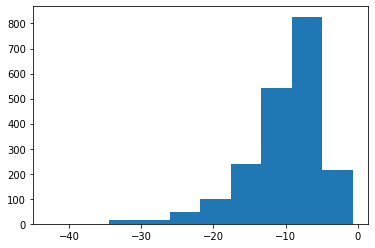

In [16]:
plt.hist(df['loudness'])

(array([ 11.,  12.,  84., 463., 538., 502., 243., 114.,  22.,  11.]),
 array([  0.    ,  25.3931,  50.7862,  76.1793, 101.5724, 126.9655,
        152.3586, 177.7517, 203.1448, 228.5379, 253.931 ]),
 <a list of 10 Patch objects>)

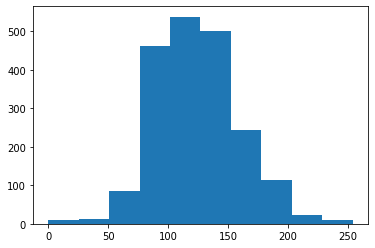

In [17]:
plt.hist(df['tempo'])

(array([1963.,    6.,    8.,    4.,    3.,    3.,    3.,    4.,    4.,
           2.]),
 array([      0. ,  894717.5, 1789435. , 2684152.5, 3578870. , 4473587.5,
        5368305. , 6263022.5, 7157740. , 8052457.5, 8947175. ]),
 <a list of 10 Patch objects>)

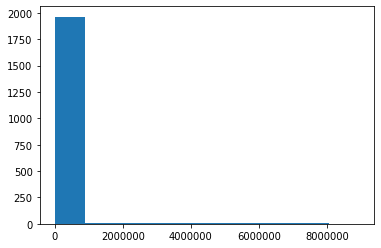

In [18]:
plt.hist(df['year'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f28f9caa6d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f28f9ed0d90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f28f9caa890>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f28f9caaf10>}

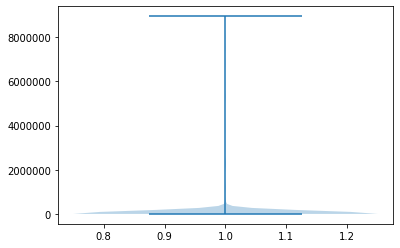

In [19]:
plt.violinplot(df[~df.year.isna()]['year'])

(array([ 30.,   8.,  19.,  99., 318., 563., 553., 269., 125.,  15.]),
 array([0.        , 0.09473275, 0.1894655 , 0.28419825, 0.378931  ,
        0.47366375, 0.5683965 , 0.66312925, 0.75786201, 0.85259476,
        0.94732751]),
 <a list of 10 Patch objects>)

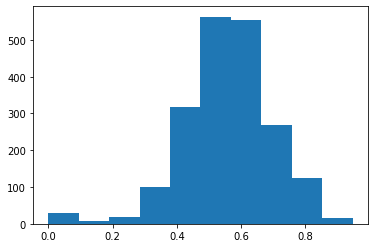

In [20]:
plt.hist(df['artist_familiarity'])

# Preprocessing

## Create Clean Frame
* Filter 0 year and years that are > 2022. ==> Note that this SIGNIFICANTLY reduces # of records we can work with so may choose not to do it.
* Select a subset of columns

In [21]:
# filtered_df = df[(df['year']>0)&(df['year']<=2022)][['loudness','tempo','artist_hotttness'
#                                                      ,'artist_familiarity','genre','song_hotttness'
#                                                      ,'track_id','song_id','artist_id'
#                                                      ,'artist_name','title']].copy()
filtered_df = df[['loudness','tempo','artist_hotttnesss'
                                                     ,'artist_familiarity','genre','song_hotttnesss'
                                                     ,'track_id','song_id','artist_id'
                                                     ,'artist_name','title']].copy()

## Pipeline for Feature Selection

In [22]:
scaler_step = Pipeline([
    ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
    ("scaler", StandardScaler())
])

encoder_step = Pipeline([
    ("encoder", OneHotEncoder())
])

In [23]:
transformers = ColumnTransformer([
    ("scaler_process", scaler_step, ['loudness', 'tempo', 'artist_hotttnesss', 'song_hotttnesss', 'artist_familiarity']),
    ("encoder_process", encoder_step, ['genre'])
])

In [24]:
feature_pipeline = Pipeline([
    ("processor", transformers),
    ("kmeans_modeller", KMeans(random_state=1)),
    ("dbscan_modeller", DBSCAN(min_samples=9))
])

### Split the data

In [25]:
train_indices = np.random.choice(df.index, size=int(df.shape[0]*0.8), replace=False)

In [26]:
test_df = df[~df.index.isin(train_indices)]
train_df = df[df.index.isin(train_indices)]

### Feed the train set to feature pipeline

In [27]:
feature_pipeline.fit(train_df)

Pipeline(memory=None,
         steps=[('processor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler_process',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=0,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                      

### Extract model

In [28]:
feat_selection_kmeans = feature_pipeline['kmeans_modeller']
feat_selection_dbscan = feature_pipeline['dbscan_modeller']

### Extract trasnformed dataframe

In [29]:
transformed_train_df = feature_pipeline['processor'].fit_transform(train_df)

### Scoring the clustering methods

#### Kmeans

In [30]:
silhouette_score(transformed_train_df, feat_selection_kmeans.labels_, metric='euclidean',sample_size=int(train_df.shape[0]*0.3))

0.16412164959534029

In [31]:
calinski_harabasz_score(transformed_train_df.toarray(), feat_selection_kmeans.labels_)

333.8714379349003

In [45]:
kmeans_classes = np.unique(feat_selection_kmeans.labels_)

#### DBSCAN

In [32]:
silhouette_score(transformed_train_df, feat_selection_dbscan.labels_, metric='euclidean',sample_size=int(train_df.shape[0]*0.3))

-0.18077837038159447

In [33]:
calinski_harabasz_score(transformed_train_df.toarray(), feat_selection_dbscan.labels_)

35.979745862468384

In [46]:
dbscan_classes =  np.unique(feat_selection_dbscan.labels_)

### SpectralClustering

In [40]:
feat_selection_spectral = SpectralClustering(n_clusters=10,random_state=1)
spectral_result = feat_selection_spectral.fit_predict(transformed_train_df)

In [41]:
silhouette_score(transformed_train_df, spectral_result, metric='euclidean',sample_size=int(train_df.shape[0]*0.3))

0.20146595670359574

In [42]:
calinski_harabasz_score(transformed_train_df.toarray(), spectral_result)

105.38874626618382

In [47]:
spectral_classes = np.unique(spectral_result)

### Visualize Clusters
* On train dataframe

In [52]:
pca_transformer = SparsePCA(n_components=transformed_train_df.size, random_state = 1, alpha=0.8)

In [53]:
pca_df_train = pca_transformer.fit_transform(transformed_train_df)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.